<a href="https://colab.research.google.com/github/mesogin/TIS2/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A7%91%EA%B3%84_%EB%B0%8F_%EC%A0%95%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/TIS/연습파일/재무제표샘플데이터.csv'
df = pd.read_csv(path, encoding = "euc-kr")
display(df.head())

#shape 속성
print(df.shape)

#인덱스와 컬럼 속성
print(df.index)
print(df.columns)

#type확인
print(type(df.columns))
print(type(df.index))

#기업 개수 세는법
#len
print(len(df["기업"].unique()))

#value_counts
print(pd.Series(df["기업"].unique()).value_counts())

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율
0,대원미디어,2016,9.776068e+10,2.341949e+10,7.434119e+10,9.499312e+10,2.379823e+09,4.804263e+08,76.044057
1,대원미디어,2017,1.043490e+11,2.339887e+10,8.095035e+10,1.207350e+11,6.987071e+09,7.797097e+09,77.576381
2,대원미디어,2018,1.255730e+11,2.402737e+10,1.015450e+11,1.633750e+11,6.412992e+09,4.153603e+09,80.865781
3,대원미디어,2019,1.361390e+11,3.494140e+10,1.011980e+11,1.915460e+11,3.664066e+09,3.181392e+09,74.334031
4,대원미디어,2020,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11,7.227984e+09,6.501209e+09,75.492644


(40, 9)
RangeIndex(start=0, stop=40, step=1)
Index(['기업', '연도', '자산총계', '부채총계', '자본총계', '매출액', '영업이익', '당기순이익', '부채비율'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>
8
대원미디어      1
서울바이오시스    1
솔브레인홀딩스    1
쎄미시스코      1
엔에프씨       1
유테크        1
인터지스       1
코오롱        1
dtype: int64


False    22
True     18
Name: 부채비율 >50, dtype: int64

False    0.55
True     0.45
Name: 부채비율 >50, dtype: float64

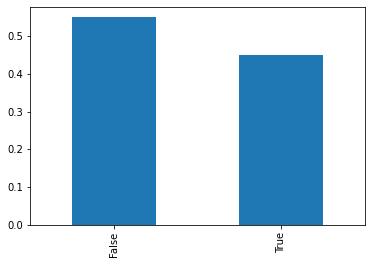

In [ ]:
df["부채비율 >50"] = df["부채비율"] > 50
# display(df)

#true false 개수 찾기
display(df["부채비율 >50"].value_counts())

#true false 비율찾기
display(df["부채비율 >50"].value_counts(normalize = True))

#그래프로 시각화하기
display(df["부채비율 >50"].value_counts(normalize = True).plot(kind = "bar"))

In [ ]:
display(df.mean())

display(df.max())

<ipython-input-30-610de9bbdc9f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.mean())


연도          2.018000e+03
자산총계        7.826858e+11
부채총계        4.942808e+11
자본총계        2.884053e+11
매출액         8.516524e+11
영업이익        3.046763e+10
당기순이익       5.503761e+10
부채비율        5.305086e+01
부채비율 >50    4.500000e-01
dtype: float64

기업                      코오롱
연도                     2020
자산총계        3708130000000.0
부채총계        2896670000000.0
자본총계        1036090000000.0
매출액         4890150000000.0
영업이익         271448000000.0
당기순이익       1444440000000.0
부채비율              82.214615
부채비율 >50               True
dtype: object

##quantile 메서드
auantile 메서드의 인자인 q는 0과 1사이 값으로 1이면 100%위치(최대값) 0이면 0%위치 최솟값을 반환합니다.

In [ ]:
#quantile
df[['매출액', '영업이익', '당기순이익']].quantile(0.7)

매출액      4.705058e+11
영업이익     1.466198e+10
당기순이익    6.972623e+09
Name: 0.7, dtype: float64

In [ ]:
#연습문제
#매출액, 영업이익에 대해서 가각 최대값과 최소값인 기업 및 해당연도를 구하시오.
sales_Max = df['매출액'].quantile(1)
sales_Min = df['매출액'].quantile(0)
# df[sales_Max]
sales_Max1 = df.loc[df['매출액'].isin([sales_Max])]
display(sales_Max1)
display(sales_Max1['기업'], sales_Max1['연도'])

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율,부채비율 >50
39,코오롱,2020,3.708130e+12,2.849100e+12,8.590350e+11,4.890150e+12,2.714480e+11,1.666080e+11,23.166223,False


39    코오롱
Name: 기업, dtype: object

39    2020
Name: 연도, dtype: int64

##조건부 연산 : groupby 메서드
geoupby 매서드는 조건 변수에 따른 대상 변수의 통계량을 구하는데 사용됩니다.
```python
DataFrame.groupby(조건변수)[대상변수].통계 관련 메서드
```


In [ ]:
#기업에서 영업이익 최대치
display(df.groupby("기업")["영업이익"].max())

기업
대원미디어      7.227984e+09
서울바이오시스    2.738493e+10
솔브레인홀딩스    1.056940e+11
쎄미시스코      3.346492e+09
엔에프씨       6.821097e+09
유테크        2.044100e+09
인터지스       1.490524e+10
코오롱        2.714480e+11
Name: 영업이익, dtype: float64

In [ ]:
#연도와 부채비율 > 50 에 따른 영업이익 최대값
result = df.groupby(["연도", "부채비율 >50"])["영업이익"].max()
display(result) 

연도    부채비율 >50
2016  False       1.332050e+11
      True        1.051390e+11
2017  False       1.089940e+11
      True        1.056940e+11
2018  False       1.050160e+11
      True        6.412992e+09
2019  False       1.343990e+11
      True        1.441873e+10
2020  False       2.714480e+11
      True        1.657536e+10
Name: 영업이익, dtype: float64

In [ ]:
#as_index 인자
result = df.groupby(["연도", "부채비율 >50"], as_index = False)["영업이익"].max()
display(result) 

,연도,부채비율 >50,영업이익
0,2016,False,1.332050e+11
1,2016,True,1.051390e+11
2,2017,False,1.089940e+11
3,2017,True,1.056940e+11
4,2018,False,1.050160e+11
5,2018,True,6.412992e+09
6,2019,False,1.343990e+11
7,2019,True,1.441873e+10
8,2020,False,2.714480e+11
9,2020,True,1.657536e+10


In [ ]:
#연습문제
#기업별 (5개년도의) 매출액 평균을 구하시오
result1 = df.groupby(["기업"], as_index = False) ["매출액"].mean()
result2 = df.groupby(["기업"], as_index = False) ["매출액"].min()
result3 = df.groupby(["기업"], as_index = False) ["매출액"].max()
display(result1)
display(result2)
display(result3)



,기업,매출액
0,대원미디어,1.673752e+11
1,서울바이오시스,3.894447e+11
2,솔브레인홀딩스,7.490595e+11
3,쎄미시스코,1.803604e+10
4,엔에프씨,3.007670e+10
5,유테크,3.655787e+10
6,인터지스,4.792582e+11
7,코오롱,4.368342e+12


,기업,매출액
0,대원미디어,9.499312e+10
1,서울바이오시스,3.506400e+11
2,솔브레인홀딩스,7.225210e+11
3,쎄미시스코,1.249716e+10
4,엔에프씨,2.404593e+10
5,유테크,2.835045e+10
6,인터지스,4.583170e+11
7,코오롱,3.936860e+12


,기업,매출액
0,대원미디어,2.662270e+11
1,서울바이오시스,4.312820e+11
2,솔브레인홀딩스,7.755980e+11
3,쎄미시스코,2.502729e+10
4,엔에프씨,3.332451e+10
5,유테크,5.257768e+10
6,인터지스,5.019650e+11
7,코오롱,4.890150e+12


In [ ]:
display(df.head())

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율,부채비율 >50
0,대원미디어,2016,9.776068e+10,2.341949e+10,7.434119e+10,9.499312e+10,2.379823e+09,4.804263e+08,76.044057,True
1,대원미디어,2017,1.043490e+11,2.339887e+10,8.095035e+10,1.207350e+11,6.987071e+09,7.797097e+09,77.576381,True
2,대원미디어,2018,1.255730e+11,2.402737e+10,1.015450e+11,1.633750e+11,6.412992e+09,4.153603e+09,80.865781,True
3,대원미디어,2019,1.361390e+11,3.494140e+10,1.011980e+11,1.915460e+11,3.664066e+09,3.181392e+09,74.334031,True
4,대원미디어,2020,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11,7.227984e+09,6.501209e+09,75.492644,True


In [ ]:
#기업별 부채비율 50%초과 유무 별, 부채 평균을 구하시오.
result = df.groupby(["기업", "부채비율 >50"], as_index = False) ["부채총계"].mean()
display(result)

,기업,부채비율 >50,부채총계
0,대원미디어,True,2.824938e+10
1,서울바이오시스,False,3.360593e+11
2,솔브레인홀딩스,True,2.815848e+11
3,쎄미시스코,True,9.969740e+09
4,엔에프씨,False,3.053061e+10
5,엔에프씨,True,2.668186e+10
6,유테크,False,4.974998e+10
7,유테크,True,1.431844e+10
8,인터지스,False,2.486104e+11
9,코오롱,False,2.735646e+12


##agg메서드
여러 함수를 동시에 사용하려면 agg 메서드를 사용해야합니다.

In [ ]:
#agg 메서드로 대상변수를 여러변수 적용하기
import numpy as np
result = df.groupby("기업", as_index = False)[["영업이익", "매출액"]].agg([max, min, np.mean])
display(result)

영업이익                                       매출액                \
                  max           min          mean           max           min   
기업                                                                              
대원미디어    7.227984e+09  2.379823e+09  5.334387e+09  2.662270e+11  9.499312e+10   
서울바이오시스  2.738493e+10  1.025616e+10  1.811337e+10  4.312820e+11  3.506400e+11   
솔브레인홀딩스  1.056940e+11  4.624502e+09  4.929032e+10  7.755980e+11  7.225210e+11   
쎄미시스코    3.346492e+09 -7.782689e+09 -2.289212e+09  2.502729e+10  1.249716e+10   
엔에프씨     6.821097e+09  3.838921e+09  5.071872e+09  3.332451e+10  2.404593e+10   
유테크      2.044100e+09 -1.162015e+10 -7.330405e+09  5.257768e+10  2.835045e+10   
인터지스     1.490524e+10  6.479330e+09  9.838269e+09  5.019650e+11  4.583170e+11   
코오롱      2.714480e+11  1.050160e+11  1.506124e+11  4.890150e+12  3.936860e+12   

                       
                 mean  
기업                     
대원미디어    1.673752e+11  
서울바이오시스  3.894447e+11  
솔브레인홀딩스  7.490595e+11  
쎄미시스코    1.803604e+10  
엔에프씨     3.007670e+10  
유테크      3.655787e+10  
인터지스     4.792582e+11  
코오롱      4.368342e+12

In [ ]:
#영업이익은 최대치, 최소치    매출액은 평균값만 구하기
result = df.groupby("기업", as_index = False)[["영업이익", "매출액"]].agg({"영업이익":[max, min], "매출액":[np.mean]})
display(result)

기업          영업이익                         매출액
                     max           min          mean
0    대원미디어  7.227984e+09  2.379823e+09  1.673752e+11
1  서울바이오시스  2.738493e+10  1.025616e+10  3.894447e+11
2  솔브레인홀딩스  1.056940e+11  4.624502e+09  7.490595e+11
3    쎄미시스코  3.346492e+09 -7.782689e+09  1.803604e+10
4     엔에프씨  6.821097e+09  3.838921e+09  3.007670e+10
5      유테크  2.044100e+09 -1.162015e+10  3.655787e+10
6     인터지스  1.490524e+10  6.479330e+09  4.792582e+11
7      코오롱  2.714480e+11  1.050160e+11  4.368342e+12

In [ ]:
#결측치 처리
#결측 생성
import numpy as np
np_nan_value = np.nan
float_nan_value = float('nan')
print(type(np_nan_value), np_nan_value)
print(type(float_nan_value), float_nan_value)
np_nan_value

<class 'float'> nan
<class 'float'> nan


nan

##결측 판단: isnull과 notnull 메서드
isnull 메서드는 데이터프레임 또는 시리즈에 있는 요소가 결측이면 True 아니면 False를 반환한다.  
notnull 메서드는 만대로 결측이면 False 아니면 True 반환

In [ ]:
s_df = df.iloc[4:8, 2:6]
display(s_df)
display(s_df.isnull())
display(s_df.notnull())

#null값 개수 찾기
display(s_df.isnull().sum(axis = 0))

,자산총계,부채총계,자본총계,매출액
4,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11


,자산총계,부채총계,자본총계,매출액
4,False,False,False,False
5,True,True,True,True
6,True,True,True,True
7,False,False,False,False


,자산총계,부채총계,자본총계,매출액
4,True,True,True,True
5,False,False,False,False
6,False,False,False,False
7,True,True,True,True


자산총계    2
부채총계    2
자본총계    2
매출액     2
dtype: int64

In [ ]:
#dropna 비어있는 데이터 삭제
display(s_df.dropna().shape)
display(s_df)


(2, 4)

,자산총계,부채총계,자본총계,매출액
4,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11


,자산총계,부채총계,자본총계,매출액
4,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11


In [ ]:
#결측 대체 : fillna 메서드
#결측을 제거하지 않고 채우는경우 fillna메서드 사용가능
display(s_df.fillna(0))


In [ ]:
# 비어 있을 경우, 바로 위의 데이터를 입력
display(s_df.fillna(method = "ffill"))

,자산총계,부채총계,자본총계,매출액
4,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
5,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
6,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
7,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11


In [ ]:
# 비어 있을 경우, 바로 아래의 데이터를 입력
df.fillna(method = 'bfill')  

In [ ]:
#dorp_duplicates 메서드
#중복 행 제거 함수
display(df.drop_duplicates(["기업"], keep = "first"))

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율,부채비율 >50
0,대원미디어,2016,9.776068e+10,2.341949e+10,7.434119e+10,9.499312e+10,2.379823e+09,4.804263e+08,76.044057,True
5,서울바이오시스,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
10,솔브레인홀딩스,2016,8.293910e+11,2.684180e+11,5.609730e+11,7.225210e+11,1.051390e+11,7.452030e+10,67.636787,True
15,쎄미시스코,2016,3.553654e+10,6.320311e+09,2.921623e+10,1.249716e+10,1.025104e+09,1.621465e+09,82.214615,True
20,엔에프씨,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
25,유테크,2016,6.425440e+10,3.822314e+10,2.603126e+10,2.835045e+10,-1.027313e+10,-1.166355e+10,40.512810,False
30,인터지스,2016,5.141900e+11,2.933420e+11,2.208480e+11,4.653970e+11,1.072902e+10,7.372879e+09,42.950605,False
35,코오롱,2016,3.332550e+12,2.502330e+12,8.302250e+11,3.936860e+12,1.332050e+11,2.745606e+10,24.912568,False


In [ ]:
#unique 메서드
display(df["기업"].unique())

array(['대원미디어', '서울바이오시스', '솔브레인홀딩스', '쎄미시스코', '엔에프씨', '유테크', '인터지스',
       '코오롱'], dtype=object)

In [ ]:
#연습문제
#df에서 대상연도를 고유하게 추출하시오
display(df["연도"].unique())

#고유한 것들의 개수 확인방법 .nunique()
display(df["연도"].nunique())


array([2016, 2017, 2018, 2019, 2020])

5

In [ ]:
#데이터 정렬
display(df.sort_values(["영업이익", "당기순이익"], ascending = False).head())

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율,부채비율 >50
39,코오롱,2020,3.708130e+12,2.849100e+12,8.590350e+11,4.890150e+12,2.714480e+11,1.666080e+11,23.166223,False
38,코오롱,2019,3.618570e+12,2.896670e+12,7.219040e+11,4.284390e+12,1.343990e+11,-2.222093e+10,19.949944,False
35,코오롱,2016,3.332550e+12,2.502330e+12,8.302250e+11,3.936860e+12,1.332050e+11,2.745606e+10,24.912568,False
36,코오롱,2017,3.688370e+12,2.785430e+12,9.029420e+11,4.405820e+12,1.089940e+11,9.852028e+10,24.480781,False
11,솔브레인홀딩스,2017,8.959500e+11,2.460910e+11,6.498590e+11,7.755980e+11,1.056940e+11,4.308634e+10,72.532984,True


In [ ]:
#연습: df에서 기업명을 오름차순으로 보여주세요
display(df["기업"].unique())
display(df.sort_values(["기업"], ascending = True))

array(['대원미디어', '서울바이오시스', '솔브레인홀딩스', '쎄미시스코', '엔에프씨', '유테크', '인터지스',
       '코오롱'], dtype=object)

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율,부채비율 >50
0,대원미디어,2016,9.776068e+10,2.341949e+10,7.434119e+10,9.499312e+10,2.379823e+09,4.804263e+08,76.044057,True
1,대원미디어,2017,1.043490e+11,2.339887e+10,8.095035e+10,1.207350e+11,6.987071e+09,7.797097e+09,77.576381,True
2,대원미디어,2018,1.255730e+11,2.402737e+10,1.015450e+11,1.633750e+11,6.412992e+09,4.153603e+09,80.865781,True
3,대원미디어,2019,1.361390e+11,3.494140e+10,1.011980e+11,1.915460e+11,3.664066e+09,3.181392e+09,74.334031,True
4,대원미디어,2020,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11,7.227984e+09,6.501209e+09,75.492644,True
9,서울바이오시스,2020,5.828830e+11,3.635450e+11,2.193370e+11,4.312820e+11,2.738493e+10,1.964753e+10,37.629758,False
7,서울바이오시스,2018,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11,1.669902e+10,3.600975e+09,38.879764,False
8,서울바이오시스,2019,5.790810e+11,3.915870e+11,1.874940e+11,3.506400e+11,1.025616e+10,1.454475e+09,32.377888,False
5,서울바이오시스,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,서울바이오시스,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
